In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

In [2]:


# Load the training and test datasets
train_data = pd.read_csv('data/cleaned_data_train.csv')
test_data = pd.read_csv('data/cleaned_data_test.csv')
# Convert 'Cancer' column to numeric
train_data['Cancer'] = train_data['Cancer'].astype(int)
test_data['Cancer'] = test_data['Cancer'].astype(int)

# Separate features (FPKM) and target (Cancer)
X_train = train_data.drop(columns=['Cancer', 'Sample'])
y_train = train_data['Cancer']

X_test = test_data.drop(columns=['Cancer', 'Sample'])
y_test = test_data['Cancer']


In [3]:
# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

### Linear Regression ###
F1 Score: 0.9696969696969697
Mean Squared Error: 0.7219968194829911
R^2 Score: -5.702193332857825
Linear Regression Coefficients:
FPKM Coefficient: 0.0007788808565533884
Intercept: 0.7894736842105263


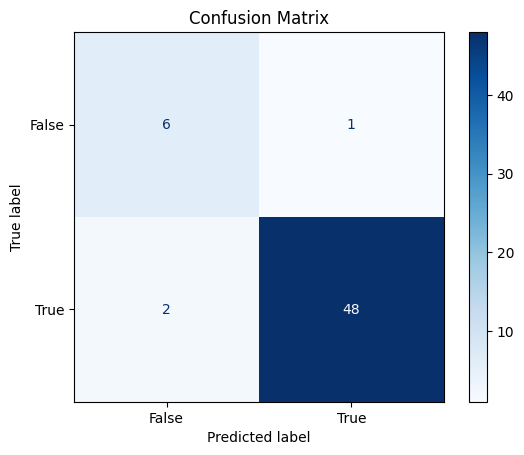

In [5]:



# Linear Regression
print("### Linear Regression ###")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
# Calculate f1 score
f1 = f1_score(y_test, (y_pred_linear > 0.5).astype(int))
print(f"F1 Score: {f1}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Coefficient of FPKM for Linear Regression
print("Linear Regression Coefficients:")
print(f"FPKM Coefficient: {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}")

# Confusion Matrix
y_pred_prob = linear_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



### Logistic Regression ###
F1 Score: 0.9696969696969697
Accuracy: 0.9473684210526315
Logistic Regression Coefficients:
FPKM Coefficient: 0.0010276600133968831
Intercept: 5.3283534886525095


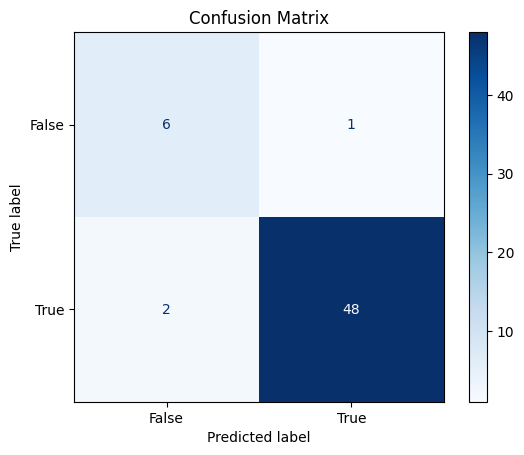

In [6]:


# Logistic Regression
print("\n### Logistic Regression ###")
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
# Calculate f1 score
f1 = f1_score(y_test, y_pred_logistic)
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Coefficient of FPKM for Logistic Regression
print("Logistic Regression Coefficients:")
print(f"FPKM Coefficient: {logistic_model.coef_[0][0]}")
print(f"Intercept: {logistic_model.intercept_[0]}")

y_pred_prob = logistic_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [7]:

# Interpret Results
if linear_model.coef_[0] > 0:
    print("Linear Regression: FPKM is positively related to Cancer.")
else:
    print("Linear Regression: FPKM is negatively related to Cancer.")

if logistic_model.coef_[0][0] > 0:
    print("Logistic Regression: Higher FPKM values increase the probability of Cancer.")
else:
    print("Logistic Regression: Higher FPKM values decrease the probability of Cancer.")


Linear Regression: FPKM is positively related to Cancer.
Logistic Regression: Higher FPKM values increase the probability of Cancer.


# **Interpretation of Results**

Both models have good F1 score and accuracy score, and the confusion matrix, indicating both models are good at classifying cancer and non-cancer patients. Even though the dataset is very imbalanced, the models are able to predict the cancer patients with high accuracy according to the confusion matrix.

The good thing about linear and logistical models is that they are easy to interpret. The coefficients of the features can be used to interpret the importance of the features in predicting the target variable. So a positive coefficient means the higher that specific gene expresses, the more likely the patient has cancer. A negative coefficient means the lower that specific gene expresses, the more likely the patient has cancer. It will be a good way for Biologists to understand the importance of the genes in predicting cancer, and finding potential biomarkers for cancer.


# **Gene Correlation Analysis**


Genes that positively affect the probability of cancer:
ENSG00000229056    0.010364
ENSG00000204397    0.010077
ENSG00000185222    0.009312
ENSG00000254162    0.009205
ENSG00000109321    0.009120
ENSG00000272325    0.009013
ENSG00000225630    0.008463
ENSG00000084070    0.008381
ENSG00000273290    0.008187
ENSG00000228474    0.008176
dtype: float64

Genes that negatively affect the probability of cancer:
ENSG00000206417   -0.015921
ENSG00000266371   -0.015949
ENSG00000247746   -0.016106
ENSG00000225113   -0.016267
ENSG00000223342   -0.016337
ENSG00000215458   -0.016408
ENSG00000235903   -0.016422
ENSG00000103832   -0.016904
ENSG00000100139   -0.016924
ENSG00000269086   -0.017420
dtype: float64


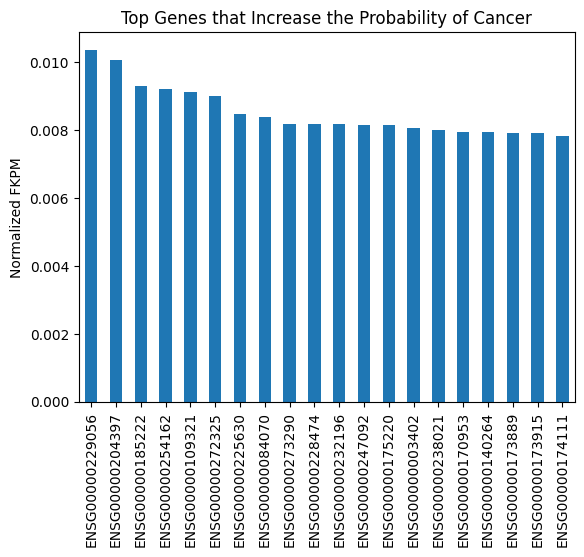

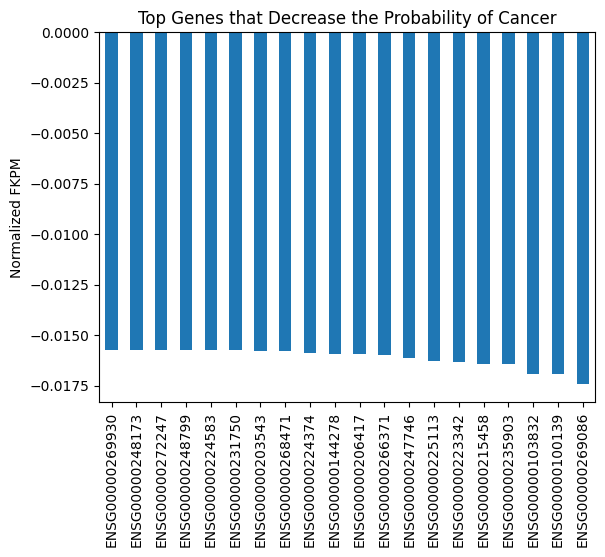

In [15]:
# Find which genes positively and negatively affect the probability of cancer
genes = X_train.columns
gene_weights = logistic_model.coef_[0]
gene_weights = pd.Series(gene_weights, index=genes)
gene_weights = gene_weights.sort_values(ascending=False)

print("\nGenes that positively affect the probability of cancer:")
print(gene_weights.head(10))

print("\nGenes that negatively affect the probability of cancer:")
print(gene_weights.tail(10))

# Plot a graph of the top 20 genes increase the probability of cancer
top_genes = gene_weights.head(20)
top_genes.plot(kind='bar')
plt.title('Top Genes that Increase the Probability of Cancer')
plt.ylabel('Normalized FKPM')
plt.show()

# Plot a graph of the top 20 genes decrease the probability of cancer
bottom_genes = gene_weights.tail(20)
bottom_genes.plot(kind='bar')
plt.title('Top Genes that Decrease the Probability of Cancer')
plt.ylabel('Normalized FKPM')
plt.show()
